## Final Project Submission

* Student name: Charlie Jin
* Student pace: Full time
* Scheduled project review date/time: Mar 10
* Instructor name: Daniel
* Blog post URL:

**<font size="10"> Microsoft's Movies Report</font>**


## Overview ##

   My project analyzes movies earnings and box office results to reach a necessary conclusion.   Microsoft needs to know 
that their investment in Flatiron Pictures Studios is a profitable one.   To do this, my project needs to reach several milestones and conclusions to come up with three recommendations in order for Microsoft to believe in the possibility of studio profitability.  Using open sources like IMDB, rottentomatoes, boxofficemojo a comprehensive analytical and mathematical report can and will be done.

## Business Problem

Microsoft is not confident in their investment in Flatiron Pictures Studio.   Or they don't know what the plan of action is and the next steps to take.   How to lead them in the right path.

## Data Understanding

## Part I: Creating SQL Dataframe

-Merge all the SQL schemas.   There are 7 provided.

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [4]:
import pandas as pd
import os

In [5]:
import pandas as pd
import numpy as np
import sqlite3 as sql

In [6]:
con = sql.connect(r"C:\Users\somep\Documents\New-Movie-Studio-Name\im.db")

In [7]:
database = "im.db"
connection = sql.connect(database)

In [8]:
query = '''SELECT * FROM im.db'''

In [9]:
schema_df = pd.read_sql("""

SELECT *
FROM sqlite_master

""", con)

schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [10]:
print(schema_df['sql'].iloc[0])

CREATE TABLE "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
)


In [11]:
#import sqlite3
#conn = sqlite3.connect('im.db')
#c = conn.cursor()

#c.execute("""create table emp(movie_basics,directors,known_for,movie_akas,movie_ratings,persons,principals,writers)""")

#conn.commit()

In [12]:
movie_basics_df = pd.read_sql("""

SELECT *
FROM movie_basics

""", con)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [13]:
directors_df = pd.read_sql("""

SELECT *
FROM directors

""", con)

directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [14]:
known_for_df = pd.read_sql("""

SELECT *
FROM known_for

""", con)

known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [15]:
movie_akas_df = pd.read_sql("""

SELECT *
FROM movie_akas

""", con)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [16]:
movie_ratings_df = pd.read_sql("""

SELECT *
FROM movie_ratings

""", con)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
persons_df = pd.read_sql("""

SELECT *
FROM persons

""", con)

persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [18]:
principals_df = pd.read_sql("""

SELECT *
FROM principals

""", con)

principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [19]:
writers_df = pd.read_sql("""

SELECT *
FROM writers

""", con)

writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [20]:
movie_basics_directors = pd.merge(movie_basics_df, directors_df)
movie_basics_directors.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id'],
      dtype='object')

In [21]:
movie_basics_directors.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411


In [22]:
MOVIEDIRECTORSRATINGS = pd.merge(movie_basics_directors, movie_ratings_df)
MOVIEDIRECTORSRATINGS.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes'],
      dtype='object')

In [23]:
MOVIEDIRECTORSRATINGS.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43


In [24]:
MOVIEDIRECTORSRATINGS2 = pd.merge(MOVIEDIRECTORSRATINGS, known_for_df)
MOVIEDIRECTORSRATINGS2.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes'],
      dtype='object')

In [25]:
MOVIEDIRECTORSRATINGS2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes
0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,6.5,119
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,6.5,119
4,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",nm6883878,4.1,32


In [26]:
MOVIEDIRECTORSRATINGS3 = pd.merge(MOVIEDIRECTORSRATINGS2, movie_akas_df)
MOVIEDIRECTORSRATINGS3.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title'],
      dtype='object')

In [27]:
MOVIEDIRECTORSRATINGS3.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,1,La Telenovela Errante,None,None,original,None,1.0
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,2,The Wandering Soap Opera,XWW,en,imdbDisplay,None,0.0
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,3,La Telenovela Errante,CL,None,None,None,0.0
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,4,La novela errante,CL,None,None,informal alternative title,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,5,Objazdowa opera mydlana,PL,None,imdbDisplay,None,0.0


In [28]:
MOVIEDIRECTORSRATINGS4 = pd.merge(MOVIEDIRECTORSRATINGS3, persons_df)
MOVIEDIRECTORSRATINGS4.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_name', 'birth_year', 'death_year',
       'primary_profession'],
      dtype='object')

In [29]:
MOVIEDIRECTORSRATINGS4.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession
0,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,1,La Telenovela Errante,None,None,original,None,1.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,2,The Wandering Soap Opera,XWW,en,imdbDisplay,None,0.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,3,La Telenovela Errante,CL,None,None,None,0.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,4,La novela errante,CL,None,None,informal alternative title,0.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119,5,Objazdowa opera mydlana,PL,None,imdbDisplay,None,0.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"


In [30]:
MOVIEDIRECTORSRATINGS5 = pd.merge(MOVIEDIRECTORSRATINGS4, principals_df)
MOVIEDIRECTORSRATINGS5.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'category', 'job', 'characters'],
      dtype='object')

In [31]:
MOVIEDIRECTORSRATINGS5.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes,ordering,...,types,attributes,is_original_title,primary_name,birth_year,death_year,primary_profession,category,job,characters
0,tt1928329,Lines of Wellington,Linhas de Wellington,2012,151.0,"Drama,History,War",nm0765384,6.2,1235,5,...,imdbDisplay,None,0.0,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",director,None,None
1,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,6.5,119,5,...,imdbDisplay,None,0.0,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",director,original director,None
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,6.5,119,5,...,imdbDisplay,None,0.0,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",director,original director,None
3,tt1236371,Mysteries of Lisbon,Mistérios de Lisboa,2010,272.0,"Drama,Mystery,Romance",nm0749914,7.5,2928,5,...,imdbDisplay,None,0.0,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",director,None,None
4,tt1236371,Mysteries of Lisbon,Mistérios de Lisboa,2010,272.0,"Drama,Mystery,Romance",nm0749914,7.5,2928,5,...,imdbDisplay,None,0.0,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",director,None,None


In [107]:
MOVIEDIRECTORSRATINGS6 = pd.merge(MOVIEDIRECTORSRATINGS5, writers_df)
MOVIEDIRECTORSRATINGS6.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'person_id', 'averagerating', 'numvotes',
       'ordering', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'category', 'job', 'characters'],
      dtype='object')

## Part II: Merging SQL created Dataframe with CSV files

-Once all the SQL schemas have been merged, now merge the final SQL dataset with the CSV files provided.

-Drop all the columns that are not needed or are completely or nearly blank.

-Drop duplicate rows.

-Rename some columns that are the same.

In [108]:
MOVIEDIRECTORSRATINGS6.drop(['movie_id', 'original_title', 'person_id', 'types', 'ordering', 'title', 'attributes', 'is_original_title'], axis = 1, inplace=True)

In [109]:
MOVIEDIRECTORSRATINGS6.rename(columns = {'primary_title':'title','start_year':'year', 'runtime_minutes':'runtime', 'genres':'genre', 'averagerating':'average rating', 'numvotes':'total votes'}, inplace=True)

In [110]:
MOVIEDIRECTORSRATINGS6.drop_duplicates(inplace=True)

In [111]:
MOVIEDIRECTORSRATINGS6.head()

,title,year,runtime,genre,average rating,total votes,region,language,primary_name,birth_year,death_year,primary_profession,category,job,characters
0,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,PL,None,Raoul Ruiz,1941.0,2011.0,"director,writer,producer",director,original director,None
4,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,CA,None,Anthony Harrison,1961.0,NaN,"actor,writer,producer",actor,None,"[""Joseph Briteman""]"
5,Pál Adrienn,2010,136.0,Drama,6.8,451,SE,None,Ágnes Kocsis,1971.0,NaN,"director,writer,producer",director,None,None
7,Life's a Beach,2012,100.0,Comedy,3.9,219,None,None,Tony Vitale,1964.0,NaN,"producer,director,writer",director,None,None
8,Second Coming,2012,95.0,None,5.5,20,US,None,Darren Campbell,NaN,NaN,"actor,writer,director",actor,None,None


In [112]:
tablefile1 = pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\bom.movie_gross.csv.gz")

In [113]:
tablefile1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [114]:
tablefile2=pd.read_table(r"C:\Users\somep\Documents\New-Movie-Studio-Name\rt.movie_info.tsv.gz")
tablefile2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [115]:
tablefile2.rename(columns = {'theater_date':'release date'}, inplace=True)

In [116]:
tablefile2.drop(['id'], axis = 1, inplace=True)

In [117]:
tablefile2.head()

,synopsis,rating,genre,director,writer,release date,dvd_date,currency,box_office,runtime,studio
0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [118]:
tablefile3 = pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\tmdb.movies.csv.gz")
tablefile3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [119]:
tablefile3.rename(columns = {'release_date':'release date', 'vote_average':'average rating', 'vote_count':'total votes'}, inplace=True)

In [120]:
tablefile3.drop(['Unnamed: 0', 'genre_ids', 'id', 'original_title'], axis = 1, inplace=True)

In [121]:
tablefile3.head()

,original_language,popularity,release date,title,average rating,total votes
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,28.005,1995-11-22,Toy Story,7.9,10174
4,en,27.920,2010-07-16,Inception,8.3,22186


In [122]:
tablefile4 = pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\tn.movie_budgets.csv.gz")
tablefile4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [123]:
tablefile4.drop(['id'], axis = 1, inplace=True)

In [124]:
tablefile4.rename(columns = {'release_date':'release date', 'movie':'title'}, inplace=True)

In [125]:
tablefile4.head()

,release date,title,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [126]:
MOVIEDIRECTORSRATINGS7 = pd.merge(tablefile1, tablefile3)
MOVIEDIRECTORSRATINGS7.head()

,title,studio,domestic_gross,foreign_gross,year,original_language,popularity,release date,average rating,total votes
0,Toy Story 3,BV,415000000.0,652000000,2010,en,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,en,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,en,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,en,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,en,28.515,2010-05-07,6.8,12368


In [128]:
to_concat = [tablefile4, MOVIEDIRECTORSRATINGS7]
MOVIEDIRECTORSRATINGS8 = pd.concat(to_concat)
MOVIEDIRECTORSRATINGS8.head()

,release date,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,original_language,popularity,average rating,total votes
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
to_concat = [MOVIEDIRECTORSRATINGS6, MOVIEDIRECTORSRATINGS8]
MOVIEDIRECTORSRATINGS9 = pd.concat(to_concat)
MOVIEDIRECTORSRATINGS9.head()

,title,year,runtime,genre,average rating,total votes,region,language,primary_name,birth_year,...,job,characters,release date,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,original_language,popularity
0,The Wandering Soap Opera,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,PL,None,Raoul Ruiz,1941.0,...,original director,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Joe Finds Grace,2017.0,83.0,"Adventure,Animation,Comedy",8.1,263.0,CA,None,Anthony Harrison,1961.0,...,None,"[""Joseph Briteman""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pál Adrienn,2010.0,136.0,Drama,6.8,451.0,SE,None,Ágnes Kocsis,1971.0,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Life's a Beach,2012.0,100.0,Comedy,3.9,219.0,None,None,Tony Vitale,1964.0,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Second Coming,2012.0,95.0,None,5.5,20.0,US,None,Darren Campbell,NaN,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
excel_file = pd.ExcelWriter("FINAL DATASET.xlsx")

In [141]:
MOVIEDIRECTORSRATINGS9.to_excel(excel_file)

In [142]:
excel_file.save()

In [143]:
FINALDATASETCLEANED = pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\dsc-phase-1-project-v2-4\FINAL DATASET CLEANED.csv",encoding='latin-1')

In [144]:
FINALDATASETCLEANED=pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\dsc-phase-1-project-v2-4\FINAL DATASET CLEANED.csv",encoding='latin-1',parse_dates=['release date'])

In [145]:
FINALDATASETCLEANED.dtypes

Unnamed: 0                     int64
title                         object
year                         float64
runtime                      float64
genre                         object
average rating               float64
total votes                  float64
region                        object
language                      object
primary_name                  object
birth_year                   float64
death_year                   float64
primary_profession            object
category                      object
job                           object
characters                    object
release date          datetime64[ns]
production_budget             object
domestic_gross                object
foreign_gross                 object
worldwide_gross               object
net gain                      object
studio                        object
original_language             object
popularity                   float64
dtype: object

## Part III: Data Cleaning

-change the date format display to a uniform display for all rows.

-remove the $ and comma sign from box office gross in order to make column a number or float.

-drop unnecessary and no use columns.

-change all data types of "objects" to "floats."


In [146]:
FINALDATASETCLEANED['release date']=pd.to_datetime(FINALDATASETCLEANED['release date'], format='%Y/%m/%d')
FINALDATASETCLEANED['release date']=FINALDATASETCLEANED['release date'].dt.strftime('%d-%b-%Y')

In [147]:
FINALDATASETCLEANED.tail()

,Unnamed: 0,title,year,runtime,genre,average rating,total votes,region,language,primary_name,...,characters,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
21380,2698,The Escape,2018.0,NaN,NaN,7.0,1.0,NaN,NaN,NaN,...,NaN,14-Aug-2015,NaN,14000,NaN,14000,"$14,000",IFC,en,0.600
21381,2699,The Escape,2018.0,NaN,NaN,6.6,10.0,NaN,NaN,NaN,...,NaN,23-Oct-2016,NaN,14000,NaN,14000,"$14,000",IFC,en,1.176
21382,2700,Souvenir,2018.0,NaN,NaN,5.8,14.0,NaN,NaN,NaN,...,NaN,08-Sep-2016,NaN,11400,NaN,11400,"$11,400",Strand,fr,2.130
21383,2701,The Quake,2018.0,NaN,NaN,6.7,81.0,NaN,NaN,NaN,...,NaN,14-Dec-2018,NaN,6200,NaN,6200,"$6,200",Magn.,no,11.051
21384,2702,An Actor Prepares,2018.0,NaN,NaN,6.5,10.0,NaN,NaN,NaN,...,NaN,31-Aug-2018,NaN,1700,NaN,1700,"$1,700",Grav.,en,7.244


In [148]:
FINALDATASETCLEANED.drop(['Unnamed: 0', 'region', 'language', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'category', 'job', 'characters'], axis = 1, inplace=True)

In [149]:
FINALDATASETCLEANED.head()

,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
0,The Wandering Soap Opera,2017.0,80.0,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Joe Finds Grace,2017.0,83.0,"Adventure,Animation,Comedy",8.1,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pál Adrienn,2010.0,136.0,Drama,6.8,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Life's a Beach,2012.0,100.0,Comedy,3.9,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Second Coming,2012.0,95.0,NaN,5.5,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
FINALDATASETCLEANED['production_budget']=FINALDATASETCLEANED['production_budget'].str.replace(r'\W', "")

C:\Users\somep\AppData\Local\Temp\ipykernel_4624\2341965880.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FINALDATASETCLEANED['production_budget']=FINALDATASETCLEANED['production_budget'].str.replace(r'\W', "")


In [151]:
FINALDATASETCLEANED['domestic_gross']=FINALDATASETCLEANED['domestic_gross'].str.replace(r'\W', "")

C:\Users\somep\AppData\Local\Temp\ipykernel_4624\2838814049.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FINALDATASETCLEANED['domestic_gross']=FINALDATASETCLEANED['domestic_gross'].str.replace(r'\W', "")


In [152]:
FINALDATASETCLEANED['foreign_gross']=FINALDATASETCLEANED['foreign_gross'].str.replace(r'\W', "")

C:\Users\somep\AppData\Local\Temp\ipykernel_4624\3381301098.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FINALDATASETCLEANED['foreign_gross']=FINALDATASETCLEANED['foreign_gross'].str.replace(r'\W', "")


In [153]:
FINALDATASETCLEANED['worldwide_gross']=FINALDATASETCLEANED['worldwide_gross'].str.replace(r'\W', "")

C:\Users\somep\AppData\Local\Temp\ipykernel_4624\2466272076.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FINALDATASETCLEANED['worldwide_gross']=FINALDATASETCLEANED['worldwide_gross'].str.replace(r'\W', "")


In [154]:
FINALDATASETCLEANED['net gain']=FINALDATASETCLEANED['net gain'].str.replace(r'\W', "")

C:\Users\somep\AppData\Local\Temp\ipykernel_4624\171332.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FINALDATASETCLEANED['net gain']=FINALDATASETCLEANED['net gain'].str.replace(r'\W', "")


In [155]:
FINALDATASETCLEANED['production_budget'] = FINALDATASETCLEANED['production_budget'].astype(float)

In [156]:
FINALDATASETCLEANED['domestic_gross'] = FINALDATASETCLEANED['domestic_gross'].astype(float)

In [157]:
FINALDATASETCLEANED['foreign_gross'] = FINALDATASETCLEANED['foreign_gross'].astype(float)

In [158]:
FINALDATASETCLEANED['worldwide_gross'] = FINALDATASETCLEANED['worldwide_gross'].astype(float)

In [159]:
FINALDATASETCLEANED['net gain'] = FINALDATASETCLEANED['net gain'].astype(float)

In [160]:
excel_file = pd.ExcelWriter("FINAL DATASET CLEANED.xlsx")

In [161]:
FINALDATASETCLEANED.to_excel(excel_file)

In [162]:
excel_file.save()

## Part IV: Analysis

Trying to obtain the results and figures from the 4 main information columns: Production Budget, Domestic Gross, Worldwide Gross, and Net Gain.

In [163]:
myownprivatedataset = pd.read_csv(r"C:\Users\somep\Documents\New-Movie-Studio-Name\dsc-phase-1-project-v2-4\FINAL DATASET.csv",encoding='latin-1')

In [165]:
myownprivatedataset.head()

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
0,0,Star Wars: The Force Awakens,2015.0,NaN,NaN,7.4,12641.0,18-Dec-2015,NaN,936700000.0,1.131600e+05,9.367011e+09,9.367011e+09,BV,en,32.281
1,1,Star Wars: The Force Awakens,2015.0,NaN,NaN,7.4,12641.0,18-Dec-2015,NaN,936700000.0,1.131600e+05,9.367011e+09,9.367011e+09,BV,en,32.281
2,2,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,18-Dec-2015,306000000.0,936662225.0,1.116649e+09,2.053311e+09,1.747311e+09,NaN,NaN,NaN
3,3,Avatar,NaN,NaN,NaN,NaN,NaN,18-Dec-2009,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2.351345e+09,NaN,NaN,NaN
4,4,Black Panther,2018.0,NaN,NaN,5.1,11.0,18-Jan-2011,NaN,700100000.0,6.469000e+08,1.347000e+09,1.347000e+09,BV,en,2.058


In [166]:
myownprivatedataset.dtypes

ï»¿                    int64
title                 object
year                 float64
runtime              float64
genre                 object
average rating       float64
total votes          float64
release date          object
production_budget    float64
domestic_gross       float64
foreign_gross        float64
worldwide_gross      float64
net gain             float64
studio                object
original_language     object
popularity           float64
dtype: object

In [167]:
myownprivatedataset.nlargest(10, columns=['production_budget'], keep='first')

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
3,3,Avatar,NaN,NaN,NaN,NaN,NaN,18-Dec-2009,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2.351345e+09,NaN,NaN,NaN
207,207,Pirates of the Caribbean: On Stranger Tides,NaN,NaN,NaN,NaN,NaN,20-May-2011,410600000.0,241063875.0,8.046000e+08,1.045664e+09,6.350639e+08,NaN,NaN,NaN
2357,2357,Dark Phoenix,NaN,NaN,NaN,NaN,NaN,07-Jun-2019,350000000.0,42762350.0,1.070000e+08,1.497624e+08,-2.002376e+08,NaN,NaN,NaN
27,27,Avengers: Age of Ultron,NaN,NaN,NaN,NaN,NaN,01-May-2015,330600000.0,459005868.0,9.440081e+08,1.403014e+09,1.072414e+09,NaN,NaN,NaN
15,15,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN,NaN,NaN,15-Dec-2017,317000000.0,620181382.0,6.965404e+08,1.316722e+09,9.997217e+08,NaN,NaN,NaN
2,2,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,18-Dec-2015,306000000.0,936662225.0,1.116649e+09,2.053311e+09,1.747311e+09,NaN,NaN,NaN
7,7,Avengers: Infinity War,NaN,NaN,NaN,NaN,NaN,27-Apr-2018,300000000.0,678815482.0,1.369319e+09,2.048134e+09,1.748134e+09,NaN,NaN,NaN
123,123,Pirates of the Caribbean: At Worlds End,NaN,NaN,NaN,NaN,NaN,24-May-2007,300000000.0,309420425.0,6.540000e+08,9.634204e+08,6.634204e+08,NaN,NaN,NaN
228,228,Justice League,NaN,NaN,NaN,NaN,NaN,17-Nov-2017,300000000.0,229024295.0,4.269209e+08,6.559452e+08,3.559452e+08,NaN,NaN,NaN
312,312,Spectre,NaN,NaN,NaN,NaN,NaN,06-Nov-2015,300000000.0,200074175.0,6.795467e+08,8.796209e+08,5.796209e+08,NaN,NaN,NaN


In [168]:
myownprivatedataset.dropna(subset = ['production_budget'], inplace=True)

In [169]:
myownprivatedataset.nlargest(10, columns=['domestic_gross'], keep='first')

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
2,2,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,18-Dec-2015,306000000.0,936662225.0,1.116649e+09,2.053311e+09,1.747311e+09,NaN,NaN,NaN
3,3,Avatar,NaN,NaN,NaN,NaN,NaN,18-Dec-2009,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2.351345e+09,NaN,NaN,NaN
6,6,Black Panther,NaN,NaN,NaN,NaN,NaN,16-Feb-2018,200000000.0,700059566.0,6.481987e+08,1.348258e+09,1.148258e+09,NaN,NaN,NaN
7,7,Avengers: Infinity War,NaN,NaN,NaN,NaN,NaN,27-Apr-2018,300000000.0,678815482.0,1.369319e+09,2.048134e+09,1.748134e+09,NaN,NaN,NaN
9,9,Titanic,NaN,NaN,NaN,NaN,NaN,19-Dec-1997,200000000.0,659363944.0,1.548844e+09,2.208208e+09,2.008208e+09,NaN,NaN,NaN
11,11,Jurassic World,NaN,NaN,NaN,NaN,NaN,12-Jun-2015,215000000.0,652270625.0,9.965842e+08,1.648855e+09,1.433855e+09,NaN,NaN,NaN
12,12,The Avengers,NaN,NaN,NaN,NaN,NaN,04-May-2012,225000000.0,623279547.0,8.946564e+08,1.517936e+09,1.292936e+09,NaN,NaN,NaN
15,15,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN,NaN,NaN,15-Dec-2017,317000000.0,620181382.0,6.965404e+08,1.316722e+09,9.997217e+08,NaN,NaN,NaN
17,17,Incredibles 2,NaN,NaN,NaN,NaN,NaN,15-Jun-2018,200000000.0,608581744.0,6.339390e+08,1.242521e+09,1.042521e+09,NaN,NaN,NaN
18,18,The Dark Knight,NaN,NaN,NaN,NaN,NaN,18-Jul-2008,185000000.0,533720947.0,4.682753e+08,1.001996e+09,8.169962e+08,NaN,NaN,NaN


In [170]:
myownprivatedataset.nlargest(10, columns=['worldwide_gross'], keep='first')

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
3,3,Avatar,NaN,NaN,NaN,NaN,NaN,18-Dec-2009,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2.351345e+09,NaN,NaN,NaN
9,9,Titanic,NaN,NaN,NaN,NaN,NaN,19-Dec-1997,200000000.0,659363944.0,1.548844e+09,2.208208e+09,2.008208e+09,NaN,NaN,NaN
2,2,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,18-Dec-2015,306000000.0,936662225.0,1.116649e+09,2.053311e+09,1.747311e+09,NaN,NaN,NaN
7,7,Avengers: Infinity War,NaN,NaN,NaN,NaN,NaN,27-Apr-2018,300000000.0,678815482.0,1.369319e+09,2.048134e+09,1.748134e+09,NaN,NaN,NaN
11,11,Jurassic World,NaN,NaN,NaN,NaN,NaN,12-Jun-2015,215000000.0,652270625.0,9.965842e+08,1.648855e+09,1.433855e+09,NaN,NaN,NaN
79,79,Furious 7,NaN,NaN,NaN,NaN,NaN,03-Apr-2015,190000000.0,353007020.0,1.165716e+09,1.518723e+09,1.328723e+09,NaN,NaN,NaN
12,12,The Avengers,NaN,NaN,NaN,NaN,NaN,04-May-2012,225000000.0,623279547.0,8.946564e+08,1.517936e+09,1.292936e+09,NaN,NaN,NaN
27,27,Avengers: Age of Ultron,NaN,NaN,NaN,NaN,NaN,01-May-2015,330600000.0,459005868.0,9.440081e+08,1.403014e+09,1.072414e+09,NaN,NaN,NaN
6,6,Black Panther,NaN,NaN,NaN,NaN,NaN,16-Feb-2018,200000000.0,700059566.0,6.481987e+08,1.348258e+09,1.148258e+09,NaN,NaN,NaN
62,62,Harry Potter and the Deathly Hallows: Part II,NaN,NaN,NaN,NaN,NaN,15-Jul-2011,125000000.0,381193157.0,9.605000e+08,1.341693e+09,1.216693e+09,NaN,NaN,NaN


In [171]:
myownprivatedataset.nlargest(10, columns=['net gain'], keep='first')

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
3,3,Avatar,NaN,NaN,NaN,NaN,NaN,18-Dec-2009,425000000.0,760507625.0,2.015838e+09,2.776345e+09,2.351345e+09,NaN,NaN,NaN
9,9,Titanic,NaN,NaN,NaN,NaN,NaN,19-Dec-1997,200000000.0,659363944.0,1.548844e+09,2.208208e+09,2.008208e+09,NaN,NaN,NaN
7,7,Avengers: Infinity War,NaN,NaN,NaN,NaN,NaN,27-Apr-2018,300000000.0,678815482.0,1.369319e+09,2.048134e+09,1.748134e+09,NaN,NaN,NaN
2,2,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN,NaN,18-Dec-2015,306000000.0,936662225.0,1.116649e+09,2.053311e+09,1.747311e+09,NaN,NaN,NaN
11,11,Jurassic World,NaN,NaN,NaN,NaN,NaN,12-Jun-2015,215000000.0,652270625.0,9.965842e+08,1.648855e+09,1.433855e+09,NaN,NaN,NaN
79,79,Furious 7,NaN,NaN,NaN,NaN,NaN,03-Apr-2015,190000000.0,353007020.0,1.165716e+09,1.518723e+09,1.328723e+09,NaN,NaN,NaN
12,12,The Avengers,NaN,NaN,NaN,NaN,NaN,04-May-2012,225000000.0,623279547.0,8.946564e+08,1.517936e+09,1.292936e+09,NaN,NaN,NaN
62,62,Harry Potter and the Deathly Hallows: Part II,NaN,NaN,NaN,NaN,NaN,15-Jul-2011,125000000.0,381193157.0,9.605000e+08,1.341693e+09,1.216693e+09,NaN,NaN,NaN
6,6,Black Panther,NaN,NaN,NaN,NaN,NaN,16-Feb-2018,200000000.0,700059566.0,6.481987e+08,1.348258e+09,1.148258e+09,NaN,NaN,NaN
38,38,Jurassic World: Fallen Kingdom,NaN,NaN,NaN,NaN,NaN,22-Jun-2018,170000000.0,417719760.0,8.880530e+08,1.305773e+09,1.135773e+09,NaN,NaN,NaN


In [172]:
myownprivatedataset.nsmallest(10, columns=['net gain'], keep='first')

,ï»¿,title,year,runtime,genre,average rating,total votes,release date,production_budget,domestic_gross,foreign_gross,worldwide_gross,net gain,studio,original_language,popularity
2357,2357,Dark Phoenix,NaN,NaN,NaN,NaN,NaN,07-Jun-2019,350000000.0,42762350.0,107000000.0,149762350.0,-200237650.0,NaN,NaN,NaN
8374,8374,Moonfall,NaN,NaN,NaN,NaN,NaN,31-Dec-2020,150000000.0,0.0,0.0,0.0,-150000000.0,NaN,NaN,NaN
3562,3562,Mars Needs Moms,NaN,NaN,NaN,NaN,NaN,11-Mar-2011,150000000.0,21392758.0,18157000.0,39549758.0,-110450242.0,NaN,NaN,NaN
5469,5469,Men in Black: International,NaN,NaN,NaN,NaN,NaN,14-Jun-2019,110000000.0,3100000.0,0.0,3100000.0,-106900000.0,NaN,NaN,NaN
4879,4879,Town & Country,NaN,NaN,NaN,NaN,NaN,27-Apr-2001,105000000.0,6712451.0,3652318.0,10364769.0,-94635231.0,NaN,NaN,NaN
5198,5198,The Adventures of Pluto Nash,NaN,NaN,NaN,NaN,NaN,16-Aug-2002,100000000.0,4411102.0,2683893.0,7094995.0,-92905005.0,NaN,NaN,NaN
8101,8101,Bright,NaN,NaN,NaN,NaN,NaN,13-Dec-2017,90000000.0,0.0,0.0,0.0,-90000000.0,NaN,NaN,NaN
8102,8102,Army of the Dead,NaN,NaN,NaN,NaN,NaN,31-Dec-2019,90000000.0,0.0,0.0,0.0,-90000000.0,NaN,NaN,NaN
8111,8111,Call of the Wild,NaN,NaN,NaN,NaN,NaN,21-Feb-2020,82000000.0,0.0,0.0,0.0,-82000000.0,NaN,NaN,NaN
4681,4681,The Promise,NaN,NaN,NaN,NaN,NaN,21-Apr-2017,90000000.0,8224288.0,2327129.0,10551417.0,-79448583.0,NaN,NaN,NaN


In [173]:
myownprivatedataframe = pd.DataFrame({'title':['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Dark Phoenix', 'Avengers: Age of Ultron', 'Star Wars Ep. VIII: The Last Jedi', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Pirates of the Caribbean: At Worlds End', 'Justice League', 'Spectre', 'Black Panther', 'Titanic', 'Jurassic World', 'The Avengers', 'Incredibles 2', 'The Dark Knight', 'Furious 7', 'Harry Potter and the Deathly Hallows: Part II', 'Jurassic World: Fallen Kingdom'],
                                     'production_budget':['425000000', '410600000', '350000000', '330600000', '317000000', '306000000', '300000000', '300000000', '300000000', '300000000', '200000000', '200000000', '215000000', '225000000', '200000000', '185000000', '190000000', '125000000', '170000000'],
                                     'domestic_gross':['760507625', '241063875', '42762350', '459005868', '620181382', '936662225', '678815482', '309420425', '229024295', '200074175', '700059566', '659363944', '652270625', '623279547', '608581744', '533720947', '353007020', '381193157', '417719760'],
                                     'worldwide_gross':['2776345279', '1045663875', '149762350', '1403013963', '1316721747', '2053311220', '2048134200', '963420425', '655945209', '879620923', '1348258224', '2208208395', '1648854864', '1517935897', '1242520711', '1001996207', '1518722794', '1341693157', '1305772799'],
                                     'net gain':['2351345279', '635063875', '-200237650', '1072413963', '999721747', '1747311220', '1748134200', '663420425', '355945209', '579620923', '1148258224', '2008208395', '1433854864', '1292935897', '1042520711', '816996207', '1328722794', '1216693157', '1135772799']})
print(myownprivatedataframe)

                                            title production_budget  \
0                                          Avatar         425000000   
1     Pirates of the Caribbean: On Stranger Tides         410600000   
2                                    Dark Phoenix         350000000   
3                         Avengers: Age of Ultron         330600000   
4               Star Wars Ep. VIII: The Last Jedi         317000000   
5            Star Wars Ep. VII: The Force Awakens         306000000   
6                          Avengers: Infinity War         300000000   
7         Pirates of the Caribbean: At Worlds End         300000000   
8                                  Justice League         300000000   
9                                         Spectre         300000000   
10                                  Black Panther         200000000   
11                                        Titanic         200000000   
12                                 Jurassic World         215000000   
13    

## Part V: Possible Useful Charts and Results

**bar charts:** 

(These necessary figures can be obtained here.   These are charts that could possibly be useful in the final study.)

-production_budget

-domestic/worldwide gross

-net gain

-the combination of two or more of these figures together 


In [230]:
print(myownprivatedataset[['title', 'production_budget', 'domestic_gross', 'worldwide_gross', 'net gain']])

                                     title  production_budget  domestic_gross  \
2     Star Wars Ep. VII: The Force Awakens        306000000.0     936662225.0   
3                                   Avatar        425000000.0     760507625.0   
6                            Black Panther        200000000.0     700059566.0   
7                   Avengers: Infinity War        300000000.0     678815482.0   
9                                  Titanic        200000000.0     659363944.0   
...                                    ...                ...             ...   
8459                      Lunchtime Heroes           100000.0             0.0   
8460                           Open Secret           100000.0             0.0   
8461                     The Night Visitor           100000.0             0.0   
8462                          Tiger Orange           100000.0             0.0   
8463                      Family Motocross            10000.0             0.0   

      worldwide_gross      

In [231]:
budget = myownprivatedataset[['title', 'production_budget']]

In [232]:
budgetdata = budget.nlargest(10, columns=['production_budget'], keep='first')

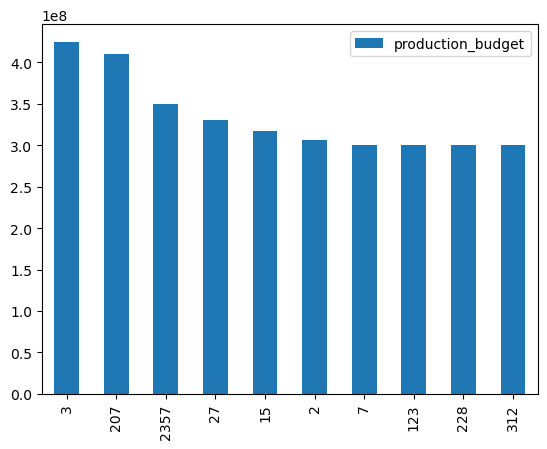

In [214]:
budgetplot=budgetdata.plot(kind="bar")

In [215]:
gross = myownprivatedataset[['title', 'domestic_gross', 'worldwide_gross']]

In [216]:
grossdata = gross.nlargest(10, columns=['domestic_gross'], keep='first')

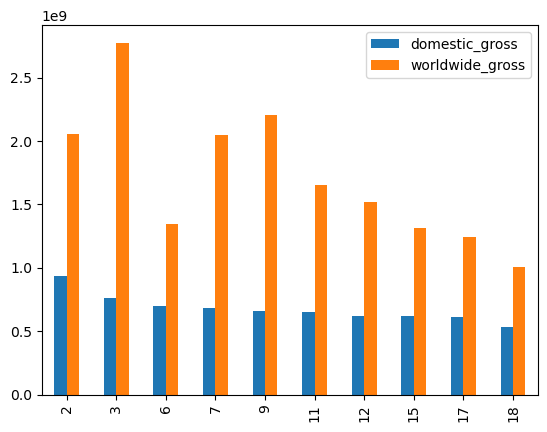

In [217]:
grossplot=grossdata.plot(kind="bar")

In [218]:
netgain = myownprivatedataset[['title', 'net gain']]

In [219]:
netgaindata = netgain.nlargest(10, columns=['net gain'], keep='first')

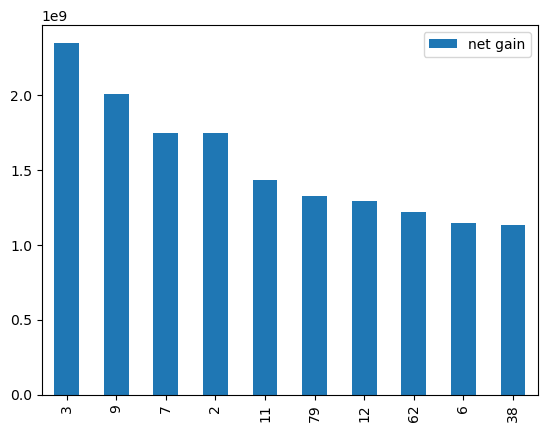

In [220]:
netgainplot=netgaindata.plot(kind="bar")

In [221]:
netgain2 = myownprivatedataset[['title', 'net gain', 'production_budget']]

In [222]:
netgain2data = netgain2.nlargest(10, columns=['net gain'], keep='first')

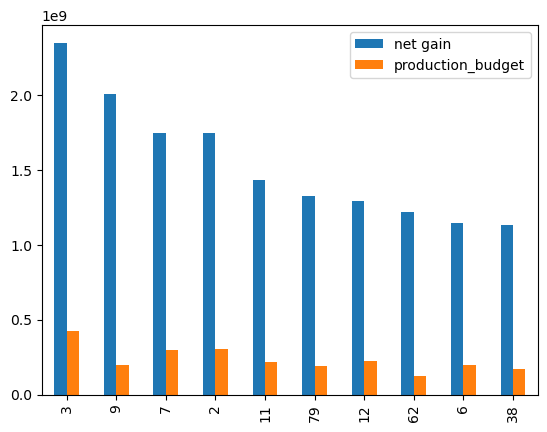

In [223]:
netgain2plot=netgain2data.plot(kind="bar")

In [224]:
netgainnegative = myownprivatedataset[['title', 'net gain']]

In [225]:
netgainnegativedata = netgainnegative.nsmallest(10, columns=['net gain'], keep='first')

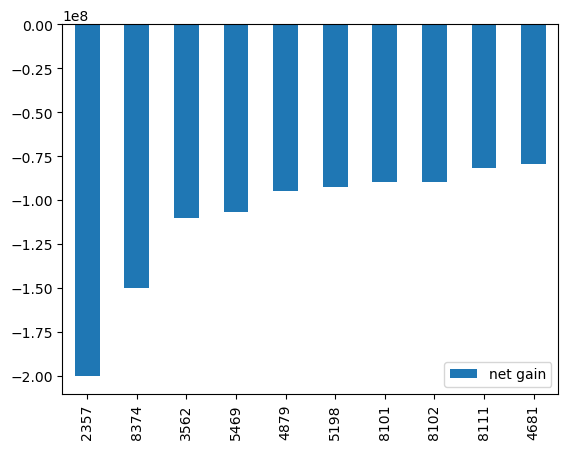

In [226]:
netgainnegativeplot=netgainnegativedata.plot(kind="bar")

In [227]:
allfour = myownprivatedataset[['title', 'production_budget', 'domestic_gross', 'worldwide_gross', 'net gain']]

In [228]:
allfourdata = allfour.nlargest(10, columns=['production_budget'], keep='first')

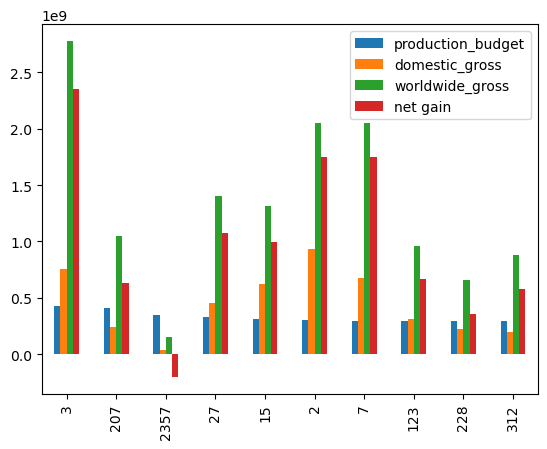

In [229]:
allfourplot = allfourdata.plot(kind="bar")

## Conclusions

This analysis leads to three recommendations for Microsoft's goals of maximizing their investments into Flatiron Movie Studios:

**Approve to make more franchise movies.** Franchise movies are one of the cornerstones to studio's success.   9 out of 10 of the highest grossing movies domestically are franchise movies.   7 out of 10 were not the first films of a franchise.
Audiences come back for more. The 2nd film often outperforms the first.   This is because of the general audience's innate higher expectations and the inherently effective power of franchise movies.  

**Approve to make certain genres a more priority investments** It is a good idea to make more movies in the genres of action, adventure, sci-fi and comic book movies encompass all of the all time highest grossing movies domestically.   Every single one of those can be labeled among one or more of those genres.

**Approve to make extremely expensive productions**  Among the 10 most profitable movies of all time (according to the net gain bar chart), every one of the ten took at least 125 million dollars to make.   They were all very costly productions.

## Final Words

With any movie that has been made, there is a possible chance of failure, but the success rate of investing in franchise movies and top genre movies are more lucrative investments than otherwise.   There is a greater chance of success investing in franchise movies and genre movies of action, adventure, sci-fi, and comic book.  

Also, it's entirely true that spending more to earn more is the inherent nature of big budget movie making.   Just an expensive production alone isn't enough to guarantee success, but if there is not at least a minimum amount of money spent making the movie, it is unlikely to produce grandiose final box office figures or move the needle much.   It's simple: with it, there's no guarantee of success but the chances are good.  Without it there is no possibility of success.